## Prueba #0401

### "Número óptimo de clústeres para agrupamiento con K-medias"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Responde la siguiente pregunta proporcionando código Python:

In [2]:
# Usaremos datos simulados.
# 3 grupos en un espacio de 8 dimensiones.
# ¡Difícil de visualizar!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape
print(X[1])

[ -3.10137732  -0.60964963  -5.25055123   7.22153079  -1.24862041
 -10.49773092  -0.21619367   2.01091436]


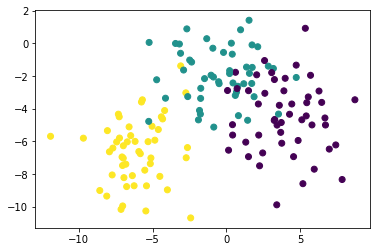

In [3]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=label)

1). Defina una función que calcule la "suma interna total de cuadrados".
- X         :   Datos.
- centers   :   Matriz que contiene las coordenadas del centroide. Calculado por kmeans.
- clusters  :   Matriz de etiquetas de clústeres. Calculado por kmeans. <br> <br>
SUGERENCIA: Implemente la fórmula de la clase teórica.

In [9]:
def total_internal_ss(X, centers, clusters):
    m = X.shape[0]      
    k = centers.shape[0]   
    n = centers.shape[1]     
    c = np.zeros((m,n)) 
    
    for j in range (k):
        indices = (clusters == j)
        for i in range (n):
            c[indices,i] = centers[j,i]
    return np.sum((X-c)**2)
            

2). Visualice como un diagrama de dispersión la "suma interna total de cuadrados" vs N# de grupos. 
- Luego, determine el número óptimo de clústeres.
- ¿Es este número el mismo que se esperaba?

In [10]:
K = np.array(range(2,12))  #n de clusters
SSE = np.array([]) 
for k in K:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit(X).labels_
    centroide = kmeans.cluster_centers_     # localiza el centroide
    SSE = np.append(SSE, total_internal_ss(X,centroide,clusters))
    

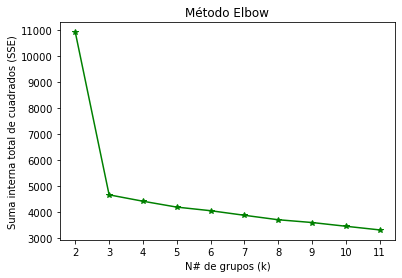

In [11]:
plt.plot(K,SSE,marker='*',c='green')
plt.xticks(K)
plt.title('Método Elbow')
plt.xlabel("N# de grupos (k)")
plt.ylabel("Suma interna total de cuadrados (SSE)")
plt.show()
plt.show()

**Según el metodo Elbow aplicado , se observa que el número de clusters idoneos es k=3, que era de esperar,ya que es el valor de grupos puesto cuando se crearón los datos **